In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 

import config

In [2]:
train_data=config.TRAIN

store_data=config.STORE

In [3]:
df1=pd.read_csv(store_data)
#print(df1.columns)
df2=pd.read_csv(train_data)
#print(df2.columns)
df=df1.merge(df2,how='left')
print(df.isnull().sum())

/home/abhash/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


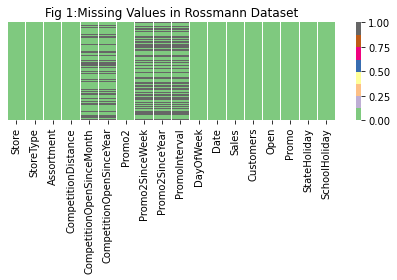

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')
plt.title("Fig 1:Missing Values in Rossmann Dataset")
plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

# List of different DataTypes

In [6]:
numerical=['Store','CompetitionDistance','Customers']

categorical_binary=['Open','Promo2','SchoolHoliday']


categorical_nominal=['StoreType','CompetitionOpenSinceMonth','Date','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval','StateHoliday']

#column by col encoder
categorical_ordinal=['Assortment','DayOfWeek']
#label encoder

target=['Sales']


# Fill NaN values

##  Filling up 'Promo2SinceWeek','Promo2SinceYear','PromoInterval' columns

In [7]:

df['Promo2SinceWeek'].fillna('0',inplace=True)
df['Promo2SinceYear'].fillna('0',inplace=True)
df['PromoInterval'].fillna('0',inplace=True)

print(df.isnull().sum())

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64


## Filling up 'CompetitionDistance' column

In [8]:

imp_mean = SimpleImputer( strategy='mean') 
imp_mean.fit(df[['CompetitionDistance']])
df[['CompetitionDistance']] = imp_mean.transform(df[['CompetitionDistance']])

## Filling up 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' 

In [9]:
imp_mean = SimpleImputer( strategy='median') 
imp_mean.fit(df[['CompetitionOpenSinceMonth']])
df[['CompetitionOpenSinceMonth']] = imp_mean.transform(df[['CompetitionOpenSinceMonth']])

In [10]:
imp_mean = SimpleImputer( strategy='median') 
imp_mean.fit(df[['CompetitionOpenSinceYear']])
df[['CompetitionOpenSinceYear']] = imp_mean.transform(df[['CompetitionOpenSinceYear']])

In [11]:
print(df.isnull().sum())


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64


# Change of Datatype

In [12]:
df['Assortment']=df['Assortment'].astype('category')
df['StoreType']=df['StoreType'].astype('category')
df['PromoInterval']=df['PromoInterval'].astype('category')
df['Promo2SinceWeek']=df['Promo2SinceWeek'].astype('category')
df['Promo2SinceYear']=df['Promo2SinceYear'].astype('category')
df['StateHoliday']=df['StateHoliday'].astype('category')
df['Date']=df['Date'].astype('datetime64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  category      
 2   Assortment                 1017209 non-null  category      
 3   CompetitionDistance        1017209 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   Promo2SinceWeek            1017209 non-null  category      
 8   Promo2SinceYear            1017209 non-null  category      
 9   PromoInterval              1017209 non-null  category      
 10  DayOfWeek                  1017209 non-null  int64         
 11  Date                       1017209 no

In [14]:
df.to_csv(config.MISSING_VALUE_HANDLED,index=False)
